This Notebook is a simple tutorial about DataFrameTransformer, DataFrameAnalyzer and Utilities modules.

-DataFrameTransformer is a dedicated module to easily make dataFrame transformations. 

-DataFrameAnalyzer is a dedicated module to plot and see important features of a spark
 Dataframe.

-Utilities module contains tool classes that support use of DataFrameTransformer and DataFrameAnalyzer modules. 

#### Importing Modules

In [1]:
# Importing DataFrameTransformer library
from DfTransf import DataFrameTransformer
# Importing DataFrameAnalyzer library
from DfAnalizer import DataFrameAnalizer
# Importing Utility library
from utilities import *
# Setting notebook to show plots inline
%matplotlib inline 
# Import module for system tools 
import os

#### Instantiation of Utility class
The utility class is a tool class that includes functions to read csv files, setting checkpoint issues (to save or temporally save dataFrames).

In [2]:
# Instance of Utilities class
tools = Utilites(sc)

#### Reading dataFrame

In [3]:
# Reading dataframe. os.getcwd() returns de current directory of the notebook 
# 'file:///' is a prefix that specifies the type of file system used, in this
# case, local file system (hard drive of the pc) is used.
filePath = "file:///" + os.getcwd() + "/foo.csv"

df = tools.readDatasetCsv(path=filePath,
 delimiterMark=',')

#### Instantiation of analyzer class

In [4]:
# Instance of analyzer class
analyzer = DataFrameAnalizer(df=df,pathFile=filePath)

DataFrameAnalizer has a method called columnAnalize. This method can check all rows of
dataFrame and tries to parse each element of each row to determine if the corresponding 
element is a string or a number. Besides, it can show 20 distinct values of each column
classified according the possible datatype value, i.e: a number can be a string, so this 
function can recognize a number in a column of string dataType by trying to parse the string. 

Also the function can plot numerical or categorical histograms.

#### General view of dataFrame

Initially it is a good idea to see a general view of the DataFrame to be analyzed. 

In the following cell, the basic results of analyzing the DataFrame are made are shown. Basic results include a table that specifies the existing datatypes in each column dataFrame and other features. Also, for this particular case, the table of dataType is shown in order to visualize a sample of column content. 

In [5]:
analyzerJson = analyzer.columnAnalize(columnList="*", printType=True, plots=False)

Min value:  1
Max value:  15


integers
7
15
8
1
9
2
10
3
11
4


No valid data to print histogram or plots argument set to False


strings
Alice
K@@@@ate
Jose
AN%####NA
Bruno((()))
Mary
Bob
BRUNO
AMANDA
Pe(/(ter


No valid data to print histogram or plots argument set to False


strings
Abonçado
Parker
Quintero
BUSH
GOMEZ
Briceño
PENN&%&/
Ibañez
Reyes
Mendoça


No valid data to print histogram or plots argument set to False


KeyboardInterrupt: 

The results obtained by running the analyzer class, details the presence of special chars, 
string columns with possible numbers on them and None and empty string values in columns.

#### Instantiation of DataFrameTransformer
DataFrameTransformer is a specialized class to make dataFrame transformations. Transformations are optimized as much as possible to internally used native spark 
transformation functions.

In [6]:
# Instance of transformer class 
transformer = DataFrameTransformer(df)

#### Trimming blanck spaces at beginning and endings of cells dataFrames

In [7]:
# Printing of original dataFrame:
print('Original dataFrame:')
transformer.getDataframe().show(5)

# Triming string blank spaces:
transformer.trimCol("*")

# Printing trimmed dataFrame:
print('Trimmed dataFrame:')
transformer.getDataframe().show(5)

Original dataFrame:
+---+-----------+-----------+---------+------------+-----+----------+--------+
| id|  firstName|   lastName|billingId|     product|price|bornClient|dummyCol|
+---+-----------+-----------+---------+------------+-----+----------+--------+
|  1|     Mary  |PENN&%&/   |       10|hamburguer  |   15|1981/09/12|    null|
|  2|   Pe(/(ter|  Parker   |       11|         ber|    5|1982/08/13|   dummy|
|  3|        Bob|       BUSH|       12|       pizza|   20|1982/07/24|    this|
|  4|  AN%####NA|     Ibañez|       13|       pasta|   21|1982/09/13|  column|
|  5|   Alice   |      GOMEZ|       14|      mojito|    6|1982/07/24|      is|
+---+-----------+-----------+---------+------------+-----+----------+--------+
only showing top 5 rows

Trimmed dataFrame:
+---+---------+--------+---------+----------+-----+----------+--------+
| id|firstName|lastName|billingId|   product|price|bornClient|dummyCol|
+---+---------+--------+---------+----------+-----+----------+--------+
|  1|    

#### Removing especial chars and accents:

In [8]:
# Printing of original dataFrame:
print('Original dataFrame:')
transformer.getDataframe().show(5)

# Remove special chars:
transformer.removeSpecialChars("*").clearAccents("*")

# Printing trimmed dataFrame:
print('Removing special chars and accents dataFrame:')
transformer.getDataframe().show(5)

Original dataFrame:
+---+---------+--------+---------+----------+-----+----------+--------+
| id|firstName|lastName|billingId|   product|price|bornClient|dummyCol|
+---+---------+--------+---------+----------+-----+----------+--------+
|  1|     Mary|PENN&%&/|       10|hamburguer|   15|1981/09/12|    null|
|  2| Pe(/(ter|  Parker|       11|       ber|    5|1982/08/13|   dummy|
|  3|      Bob|    BUSH|       12|     pizza|   20|1982/07/24|    this|
|  4|AN%####NA|  Ibañez|       13|     pasta|   21|1982/09/13|  column|
|  5|    Alice|   GOMEZ|       14|    mojito|    6|1982/07/24|      is|
+---+---------+--------+---------+----------+-----+----------+--------+
only showing top 5 rows

Removing special chars and accents dataFrame:
+---+---------+--------+---------+----------+-----+----------+--------+
| id|firstName|lastName|billingId|   product|price|bornClient|dummyCol|
+---+---------+--------+---------+----------+-----+----------+--------+
|  1|     Mary|    PENN|       10|hamburguer|

#### Drop dummy column

In [9]:
# Printing of original dataFrame:
print('Original dataFrame:')
transformer.getDataframe().show(5)

# Droping a column:
transformer.dropCol("dummyCol")

# Printing trimmed dataFrame:
print('Dataframe without dummy column:')
transformer.getDataframe().show(5)

Original dataFrame:
+---+---------+--------+---------+----------+-----+----------+--------+
| id|firstName|lastName|billingId|   product|price|bornClient|dummyCol|
+---+---------+--------+---------+----------+-----+----------+--------+
|  1|     Mary|    PENN|       10|hamburguer|   15|  19810912|    null|
|  2|    Peter|  Parker|       11|       ber|    5|  19820813|   dummy|
|  3|      Bob|    BUSH|       12|     pizza|   20|  19820724|    this|
|  4|     ANNA|  Ibanez|       13|     pasta|   21|  19820913|  column|
|  5|    Alice|   GOMEZ|       14|    mojito|    6|  19820724|      is|
+---+---------+--------+---------+----------+-----+----------+--------+
only showing top 5 rows

Dataframe without dummy column:
+---+---------+--------+---------+----------+-----+----------+
| id|firstName|lastName|billingId|   product|price|bornClient|
+---+---------+--------+---------+----------+-----+----------+
|  1|     Mary|    PENN|       10|hamburguer|   15|  19810912|
|  2|    Peter|  Parker

#### Setting all letters to lowerCase

In [10]:
# Printing of original dataFrame:
print('Original dataFrame:')
transformer.getDataframe().show(5)

print('Setting all letters to lowerCase:')
transformer.lowerCase("*")
transformer.getDataframe().show(5)

Original dataFrame:
+---+---------+--------+---------+----------+-----+----------+
| id|firstName|lastName|billingId|   product|price|bornClient|
+---+---------+--------+---------+----------+-----+----------+
|  1|     Mary|    PENN|       10|hamburguer|   15|  19810912|
|  2|    Peter|  Parker|       11|       ber|    5|  19820813|
|  3|      Bob|    BUSH|       12|     pizza|   20|  19820724|
|  4|     ANNA|  Ibanez|       13|     pasta|   21|  19820913|
|  5|    Alice|   GOMEZ|       14|    mojito|    6|  19820724|
+---+---------+--------+---------+----------+-----+----------+
only showing top 5 rows

Setting all letters to lowerCase:
+---+---------+--------+---------+----------+-----+----------+
| id|firstName|lastName|billingId|   product|price|bornClient|
+---+---------+--------+---------+----------+-----+----------+
|  1|     mary|    penn|       10|hamburguer|   15|  19810912|
|  2|    peter|  parker|       11|       ber|    5|  19820813|
|  3|      bob|    bush|       12|     

#### Date Transformation (Format of date is changed)

In [11]:
# Printing of original dataFrame:
print('Original dataFrame:')
transformer.getDataframe().show(5)

# Priting the new date format:
print('Dataframe without dummy column:')
transformer.dateTransform("bornClient", "yyyyMMdd", "dd-MM-YYYY") \
           .getDataframe() \
           .show(5)

Original dataFrame:
+---+---------+--------+---------+----------+-----+----------+
| id|firstName|lastName|billingId|   product|price|bornClient|
+---+---------+--------+---------+----------+-----+----------+
|  1|     mary|    penn|       10|hamburguer|   15|  19810912|
|  2|    peter|  parker|       11|       ber|    5|  19820813|
|  3|      bob|    bush|       12|     pizza|   20|  19820724|
|  4|     anna|  ibanez|       13|     pasta|   21|  19820913|
|  5|    alice|   gomez|       14|    mojito|    6|  19820724|
+---+---------+--------+---------+----------+-----+----------+
only showing top 5 rows

Dataframe without dummy column:
+---+---------+--------+---------+----------+-----+----------+
| id|firstName|lastName|billingId|   product|price|bornClient|
+---+---------+--------+---------+----------+-----+----------+
|  1|     mary|    penn|       10|hamburguer|   15|12-09-1981|
|  2|    peter|  parker|       11|       ber|    5|13-08-1982|
|  3|      bob|    bush|       12|     pi

#### Age calculation from born date client

In [12]:
# Printing of original dataFrame:
print('Original dataFrame:')
transformer.getDataframe().show(5)

print("Printing calculation of age born date client")
transformer.ageCalculate("bornClient", "dd-MM-YYYY", "clientAge") \
           .getDataframe() \
           .show(5)

Original dataFrame:
+---+---------+--------+---------+----------+-----+----------+
| id|firstName|lastName|billingId|   product|price|bornClient|
+---+---------+--------+---------+----------+-----+----------+
|  1|     mary|    penn|       10|hamburguer|   15|12-09-1981|
|  2|    peter|  parker|       11|       ber|    5|13-08-1982|
|  3|      bob|    bush|       12|     pizza|   20|24-07-1982|
|  4|     anna|  ibanez|       13|     pasta|   21|13-09-1982|
|  5|    alice|   gomez|       14|    mojito|    6|24-07-1982|
+---+---------+--------+---------+----------+-----+----------+
only showing top 5 rows

Printing calculation of age born date client
+---+---------+--------+---------+----------+-----+----------+---------+
| id|firstName|lastName|billingId|   product|price|bornClient|clientAge|
+---+---------+--------+---------+----------+-----+----------+---------+
|  1|     mary|    penn|       10|hamburguer|   15|12-09-1981|  35.5430|
|  2|    peter|  parker|       11|       ber|    5|

#### Changing columns order:

In [13]:
# Printing original dataframe:
print ("Original dataframe")
transformer.getDataframe().show(5)
print ("Renaming some columns of dataFrame")
transformer.renameCol(columns=[("clientAge", "age")])
transformer.getDataframe().show(5)

Original dataframe
+---+---------+--------+---------+----------+-----+----------+---------+
| id|firstName|lastName|billingId|   product|price|bornClient|clientAge|
+---+---------+--------+---------+----------+-----+----------+---------+
|  1|     mary|    penn|       10|hamburguer|   15|12-09-1981|  35.5430|
|  2|    peter|  parker|       11|       ber|    5|13-08-1982|  34.5457|
|  3|      bob|    bush|       12|     pizza|   20|24-07-1982|  34.5457|
|  4|     anna|  ibanez|       13|     pasta|   21|13-09-1982|  34.5457|
|  5|    alice|   gomez|       14|    mojito|    6|24-07-1982|  34.5457|
+---+---------+--------+---------+----------+-----+----------+---------+
only showing top 5 rows

Renaming some columns of dataFrame
+-------+---+---------+--------+---------+----------+-----+----------+
|    age| id|firstName|lastName|billingId|   product|price|bornClient|
+-------+---+---------+--------+---------+----------+-----+----------+
|35.5430|  1|     mary|    penn|       10|hamburgue

#### Changing positions of columns dataframe:

In [14]:
# Printing original dataframe:
print ("Original dataframe")
transformer.getDataframe().show(5)

# This action is to move column age, just after the lastName column
print ("age column moved")
transformer.moveCol("age", "lastName", "after")
transformer.getDataframe().show(5)

Original dataframe
+-------+---+---------+--------+---------+----------+-----+----------+
|    age| id|firstName|lastName|billingId|   product|price|bornClient|
+-------+---+---------+--------+---------+----------+-----+----------+
|35.5430|  1|     mary|    penn|       10|hamburguer|   15|12-09-1981|
|34.5457|  2|    peter|  parker|       11|       ber|    5|13-08-1982|
|34.5457|  3|      bob|    bush|       12|     pizza|   20|24-07-1982|
|34.5457|  4|     anna|  ibanez|       13|     pasta|   21|13-09-1982|
|34.5457|  5|    alice|   gomez|       14|    mojito|    6|24-07-1982|
+-------+---+---------+--------+---------+----------+-----+----------+
only showing top 5 rows

age column moved
+---+---------+--------+-------+---------+----------+-----+----------+
| id|firstName|lastName|    age|billingId|   product|price|bornClient|
+---+---------+--------+-------+---------+----------+-----+----------+
|  1|     mary|    penn|35.5430|       10|hamburguer|   15|12-09-1981|
|  2|    peter| 

#### Setting a custom transformation
The core of this function is base on the user define function provide from the lambda function provided in the 'func' argument. 

In this example, cells that are not greater than 20, are multiplied by 2, the rest of them stay intact

In [17]:
# Printing original dataframe:
print ("Original dataframe")
transformer.getDataframe().show(5)

print (' Multiplying by 10 a number if value in cell is greater than 20:')
# Replacing a number:   
func = lambda cell: (cell * 20) if ((cell != None) and (cell > 20)) else cell
transformer.setCol(['price'], func, 'integer')
transformer.getDataframe().show(20)

Original dataframe
+---+---------+--------+-------+---------+----------+-----+----------+
| id|firstName|lastName|    age|billingId|   product|price|bornClient|
+---+---------+--------+-------+---------+----------+-----+----------+
|  1|     mary|    penn|35.5430|       10|hamburguer|   15|12-09-1981|
|  2|    peter|  parker|34.5457|       11|       ber|    5|13-08-1982|
|  3|      bob|    bush|34.5457|       12|     pizza|   20|24-07-1982|
|  4|     anna|  ibanez|34.5457|       13|     pasta|   21|13-09-1982|
|  5|    alice|   gomez|34.5457|       14|    mojito|    6|24-07-1982|
+---+---------+--------+-------+---------+----------+-----+----------+
only showing top 5 rows

 Multiplying by 10 a number if value in cell is greater than 20:
+---+---------+--------+-------+---------+----------+-----+----------+
| id|firstName|lastName|    age|billingId|   product|price|bornClient|
+---+---------+--------+-------+---------+----------+-----+----------+
|  1|     mary|    penn|35.5430|       

After the transformation process detailed in the previous cells. It is a good idea to
analyze to see if the transformations have solved issued related with special characters, 
presence of number in column where is to supposed only letters, etc.

#### Analyzing columns after transformations

Min value:  1
Max value:  15


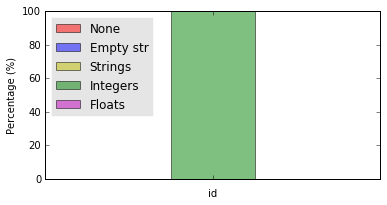

integers
7
15
8
1
9
2
10
3
11
4


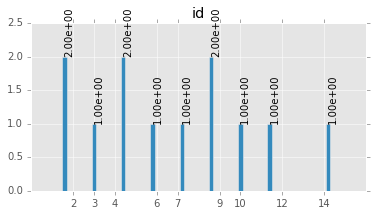

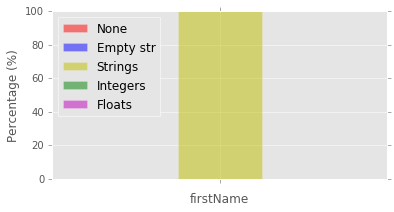

strings
alice
amanda
kate
jose
anna
peter
mary
bob
bruno
alberto


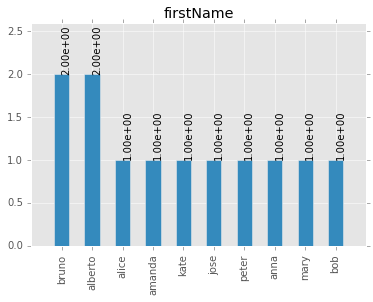

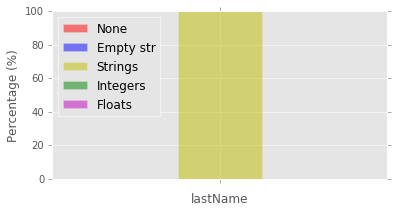

strings
parker
quintero
bush
gomez
aboncado
smith
briceno
reyes
ibanez
penn


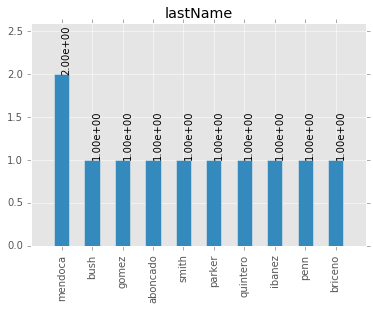

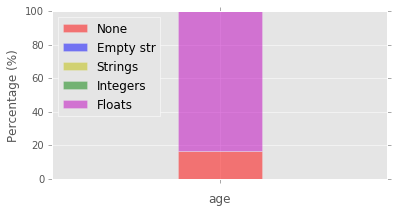

floats
35.5430
34.5457


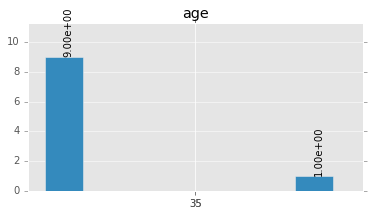

Min value:  10
Max value:  20


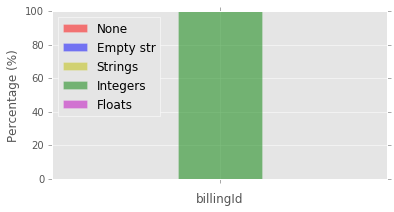

integers
15
16
17
10
18
11
19
12
20
13


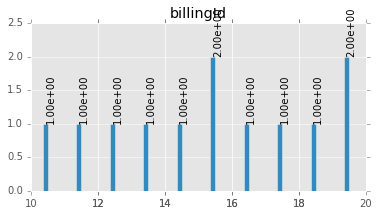

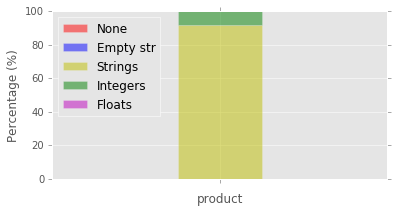

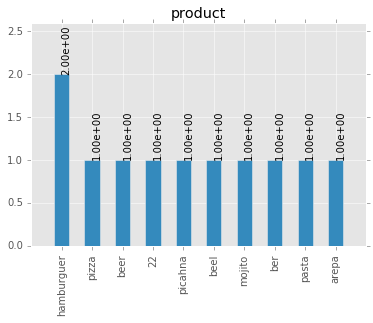

Min value:  5
Max value:  860


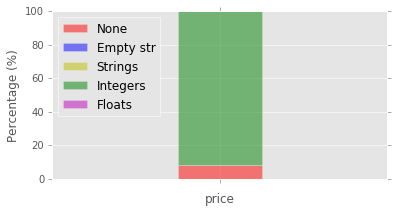

integers
15
8
20
420
860
5
6


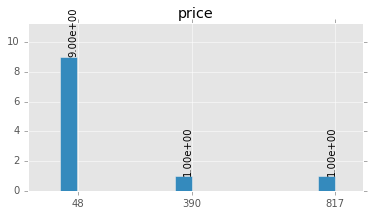

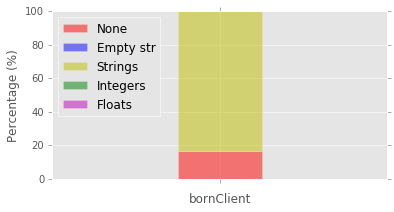

strings
18-01-1982
12-09-1981
28-07-1982
12-01-1982
13-09-1982
13-08-1982
24-07-1982


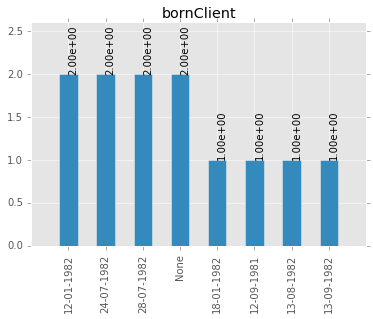

Total execution time:  63.559309005737305


foo.csv
8
12


In [18]:
# Setting the new dataFrame transformed into the analyzer class
analyzer.setDataframe(transformer.getDataframe())
analyzerJson = analyzer.columnAnalize("*", printType=True, plots=True)

It can be seen from output of the analyzer object, that there are columns with numbers
even when ceratin column (for example) is supposed to be only of words or letters. 

In order to solve this problem, operationInType function of DataFrameTransformer class 
can be used. 

operationInType function is useful to make operations in a certain element of one dataType. In this particular example, it can be seen in the last output cell (specifically in 'product' column' that are values that don't fit the rest of the data, the aren't strings but they are numbers or empty strings. operationInType can take care about them and clean the column dataFrame.

In the following example, operationInType of function of DataFrameTransformer class is run in order to converts all posible 
parsables strings to integer into a null or none value. Notice how the 22 value in product
column have been changed, but the rest of the column has remained intact.

#### Making transformation in the inferred dataType elements of a certains columns

In [19]:
# This function makes changes or transformation in the column specified only in the cells
# that are recognized as the dataType specified. 
transformer.operationInType([('product', 'integer', None)]).getDataframe().show()

+---+---------+--------+-------+---------+-----+----------+----------+
| id|firstName|lastName|    age|billingId|price|bornClient|   product|
+---+---------+--------+-------+---------+-----+----------+----------+
|  1|     mary|    penn|35.5430|       10|   15|12-09-1981|hamburguer|
|  2|    peter|  parker|34.5457|       11|    5|13-08-1982|       ber|
|  3|      bob|    bush|34.5457|       12|   20|24-07-1982|     pizza|
|  4|     anna|  ibanez|34.5457|       13|  420|13-09-1982|     pasta|
|  5|    alice|   gomez|34.5457|       14|    6|24-07-1982|    mojito|
|  6|    bruno| mendoca|34.5457|       15|   15|28-07-1982|hamburguer|
|  7|   amanda| briceno|34.5457|       16|    8|12-01-1982|     arepa|
|  8|  alberto|aboncado|34.5457|       17|  860|18-01-1982|   picahna|
|  9|    bruno| mendoca|34.5457|       15|    5|28-07-1982|   beerrrr|
| 10|     kate|   smith|34.5457|       18|    5|12-01-1982|      beer|
| 11|  alberto|quintero|   null|       19|    5|      null|      null|
| 15| 

Sometimes there a some values that are different but actually are the same. In the product
column for example, there are the following values: 'ber', 'beerrr', 'beer', 'beel'. It 
can be inferred that the correct value is beer and not the rest of them. This problem can
be solved with the lookup function of the DataFrameTransformer class.

#### Replacing multiple string values to a single string

In [20]:
transformer.lookup('product', strToReplace='beer', listStr=['ber', 'beerrrr', 'beer', 'beel']) 
transformer.getDataframe().show()

+---+---------+--------+-------+---------+-----+----------+----------+
| id|firstName|lastName|    age|billingId|price|bornClient|   product|
+---+---------+--------+-------+---------+-----+----------+----------+
|  1|     mary|    penn|35.5430|       10|   15|12-09-1981|hamburguer|
|  2|    peter|  parker|34.5457|       11|    5|13-08-1982|      beer|
|  3|      bob|    bush|34.5457|       12|   20|24-07-1982|     pizza|
|  4|     anna|  ibanez|34.5457|       13|  420|13-09-1982|     pasta|
|  5|    alice|   gomez|34.5457|       14|    6|24-07-1982|    mojito|
|  6|    bruno| mendoca|34.5457|       15|   15|28-07-1982|hamburguer|
|  7|   amanda| briceno|34.5457|       16|    8|12-01-1982|     arepa|
|  8|  alberto|aboncado|34.5457|       17|  860|18-01-1982|   picahna|
|  9|    bruno| mendoca|34.5457|       15|    5|28-07-1982|      beer|
| 10|     kate|   smith|34.5457|       18|    5|12-01-1982|      beer|
| 11|  alberto|quintero|   null|       19|    5|      null|      null|
| 15| 

As can be notice above, string specified in the list argument 'listStr' have been
replaced to 'strToReplace' value. 

### Chaining and lazy evaluation

The past transformations were done step by step, but this can be achieved by chaining
all operations into one line of code, like the cell below. This way is much more efficient and scalable because it uses all optimization issues from the lazy evaluation approach.

All the transformation set before can be done into a single line of code thanks to the 
chaining feature of the DataFrameTransformer class. This option is a optimal way to 
make different transformations, because it uses as much as possible all advantages of
the lazy evaluation approach. 

In [21]:
# Instanciate DataFrameTransfomer
transformer = DataFrameTransformer(df)
# Get original dataFrame to show it.
transformer.getDataframe().show()

# Chaining function transformations
transformer.trimCol("*") \
           .removeSpecialChars("*") \
           .clearAccents("*") \
           .lowerCase("*") \
           .dropCol("dummyCol") \
           .dateTransform("bornClient", "yyyyMMdd", "dd-MM-YYYY") \
           .ageCalculate("bornClient", "dd-MM-YYYY", "clientAge") \
           .operationInType([('product', 'integer', None)]) \
           .lookup('product', strToReplace='beer', 
                   listStr=['ber', 'beerrrr', 'beer', 'beel']) \
        
        
transformer.getDataframe().show()

+---+--------------+------------+---------+------------+-----+----------+----------+
| id|     firstName|    lastName|billingId|     product|price|bornClient|  dummyCol|
+---+--------------+------------+---------+------------+-----+----------+----------+
|  1|        Mary  | PENN&%&/   |       10|hamburguer  |   15|1981/09/12|      null|
|  2|      Pe(/(ter|   Parker   |       11|         ber|    5|1982/08/13|     dummy|
|  3|           Bob|        BUSH|       12|       pizza|   20|1982/07/24|      this|
|  4|     AN%####NA|      Ibañez|       13|       pasta|   21|1982/09/13|    column|
|  5|      Alice   |       GOMEZ|       14|      mojito|    6|1982/07/24|        is|
|  6|         BRUNO|     Mendoça|       15|hamburguer  |   15|1982/07/28|     going|
|  7|        AMANDA|  Briceño   |       16|       arepa|    8|1982/01/12|        to|
|  8|   Alberto    |    Abonçado|       17|     picahna|   43|1982/01/18|        be|
|  9|Bruno((()))   |     Mendoça|       15|  beerrrr   |    5|198